# Japan Tourism Exploratory Data Analysis

## Analysis A1: Trends in Singapore Visitor Arrivals to Japan by Month


Characteristics of this data:
November and December 2024 numbers are an estimate and not final.
Updated numbers:
December 2024 Number (Singapore - Total): 136200
Since November 2024 statistics are not final yet, I used the estimate of 95800.
Also to note that Jan 2023 to October 2024 data is Prelimiary and not final.


In [2]:
#importing dataset
import pandas as pd
SG = pd.read_csv('Inbound_Singapore.csv')
SG.head()

,Country/Area,Month (abbr),Year,Growth Rate(%),Visitor Arrivals
0,Singapore,Jan.,2018,NaN,"21,169"
1,Singapore,Feb.,2018,NaN,"23,496"
2,Singapore,Mar.,2018,NaN,"38,089"
3,Singapore,Apr.,2018,NaN,"37,605"
4,Singapore,May,2018,NaN,"39,385"


In [3]:
SG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country/Area      84 non-null     object
 1   Month (abbr)      84 non-null     object
 2   Year              84 non-null     int64 
 3   Growth Rate(%)    69 non-null     object
 4   Visitor Arrivals  82 non-null     object
dtypes: int64(1), object(4)
memory usage: 3.4+ KB


In [4]:
#Remove Growth Rate and country
SG_new = SG.drop(['Country/Area','Growth Rate(%)'], axis=1)

#Change Visitor Arrivals to integer type
SG_new.rename(columns={'Visitor Arrivals':'Visitor_Arrivals'}, inplace=True)
SG_new = SG_new.replace(',','', regex=True)
SG_new['Visitor_Arrivals'] = SG_new['Visitor_Arrivals'].apply(pd.to_numeric, downcast="signed", errors='coerce')

#Add data for November and December 2024
SG_new.iloc[-1,-1] = 136200
SG_new.iloc[-2,-1] = 95800

#Convert to Date Time format
SG_new.rename(columns={'Month (abbr)':'Month'}, inplace=True)
SG_new["Month"] = SG_new["Month"].str[:3] 
SG_new['Month_of_Year'] = pd.to_datetime(
    SG_new['Year'].astype(str) + SG_new['Month'], format='%Y%b').dt.strftime('%m%y')
neworder = ['Month', 'Year', 'Month_of_Year','Visitor_Arrivals']
SG_new=SG_new.reindex(columns=neworder)
SG_new

,Month,Year,Month_of_Year,Visitor_Arrivals
0,Jan,2018,0118,21169.0
1,Feb,2018,0218,23496.0
2,Mar,2018,0318,38089.0
3,Apr,2018,0418,37605.0
4,May,2018,0518,39385.0
...,...,...,...,...
79,Aug,2024,0824,24781.0
80,Sep,2024,0924,37433.0
81,Oct,2024,1024,68790.0
82,Nov,2024,1124,95800.0


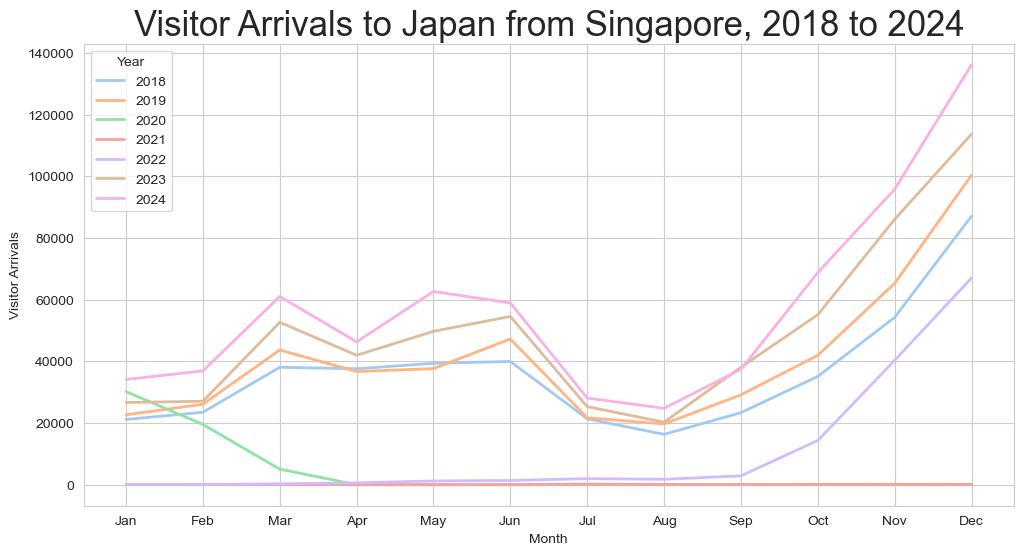

In [5]:
#Plotting line graph
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.lineplot(x='Month', y='Visitor_Arrivals', hue='Year', data=SG_new, palette='pastel',linewidth=2)
plt.legend(title='Year')
plt.xlabel('Month')
plt.ylabel('Visitor Arrivals')
plt.title('Visitor Arrivals to Japan from Singapore, 2018 to 2024',size=25)

plt.savefig("Analysis_A1.png") 
plt.show()

## Analysis (Qualitative)
The graph above highlights the trend of Singaporean travellers to Japan from the years 2018 to 2024. One prominent trend is the consistency of Singaporean visitors in certain months, highest in December. It also seems that overall, the number of Singaporean visitors have been increasing year by year.

There is a *huge* anomaly in the data, which could be attributed to the Covid-19 pandemic. From January 2020 to April 2020, the graph shows visitor arrivals decreasing towards zero. It seems that visitor arrivals remained at zero, or near zero for the rest of 2020, the whole of 2021 and most of 2022, with visitor numbers bouncing back around October 2022.
*Anomaly: Feb 2020 to September 2022*

These are the most popular and least popular months for Singaporeans to visit Japan:

Most Popular: December, November, October

Average Popularity: March, April, May, June

Least Popular: August, July, September, January, Feburary

It seems that Singaporeans tend to visit Japan most for the autumn and early winter season, and not at the peak of winter and summer. November and December also marks the year-end School Holidays, which could explain the higher visitor numbers.

Lastly, 2023 and 2024 visitor numbers also surpassed pre-covid visitor arrivals, for every single month of the year.

## Analysis (Quantitative) - Part 1

In [6]:
#Statistics by Month (2024)

#Step 1: Filter data to 2024 only
SG_2024 = SG_new[SG_new['Year'] == 2024]
print("The table below shows the data of Singapore visitors to Japan in 2024.\nDo note that most of the numbers shown are preliminary and final. I will update the numbers when the source is udpated in a future date.")
print("The data is sorted by the most to least popular months for Singapore visitors.")
SG_2024 = SG_2024.sort_values(by = "Visitor_Arrivals", ascending = False)
SG_2024 = SG_2024.reset_index(drop=True)


display(SG_2024)
#Step 2: Obtain statistical information - making use of f-string

print(f'The most popular month for Singaporean visitors to Japan is in {SG_2024["Month"].iloc[0]}, with {SG_2024["Visitor_Arrivals"].max()} visitors.')
print(f'The least popular month for Singaporean visitors to Japan is in {SG_2024["Month"].iloc[-1]}, with {SG_2024["Visitor_Arrivals"].min()} visitors.')
print(f'The average number of Singaporean visitors to Japan per month is {SG_2024["Visitor_Arrivals"].mean()}')
print(f'The standard deviation of Singaporean visitors to Japan per month is {SG_2024["Visitor_Arrivals"].std()}')
print(f'The range of Singaporean visitors to Japan in 2024 is {SG_2024["Visitor_Arrivals"].max()-SG_2024["Visitor_Arrivals"].min()}')




The table below shows the data of Singapore visitors to Japan in 2024.
Do note that most of the numbers shown are preliminary and final. I will update the numbers when the source is udpated in a future date.
The data is sorted by the most to least popular months for Singapore visitors.


,Month,Year,Month_of_Year,Visitor_Arrivals
0,Dec,2024,1224,136200.0
1,Nov,2024,1124,95800.0
2,Oct,2024,1024,68790.0
3,May,2024,0524,62676.0
4,Mar,2024,0324,61047.0
5,Jun,2024,0624,58925.0
6,Apr,2024,0424,46324.0
7,Sep,2024,0924,37433.0
8,Feb,2024,0224,36915.0
9,Jan,2024,0124,34140.0


The most popular month for Singaporean visitors to Japan is in Dec, with 136200.0 visitors.
The least popular month for Singaporean visitors to Japan is in Aug, with 24781.0 visitors.
The average number of Singaporean visitors to Japan per month is 57595.5
The standard deviation of Singaporean visitors to Japan per month is 31994.84041216646
The range of Singaporean visitors to Japan in 2024 is 111419.0


## Analysis (Quantitative) - Part 2

In [7]:
#2024 as compared to 2018

#Step 1: Aggregate data
print('\033[1m' +'Statistics by Year'+'\033[0m' )
SG_by_year = SG_new.groupby('Year')['Visitor_Arrivals'].agg(['sum', 'min', 'max', 'mean'])
print(SG_by_year)
print('\n')
#Step 2: Descriptive statistical information
print('\033[1m' +'2024 December as compared to 2018 December statistics'+'\033[0m' )
Dec24 = SG_new[SG_new['Month_of_Year'] == '1224'].iat[0,-1]
Dec18 = SG_new[SG_new['Month_of_Year'] == '1218'].iat[0,-1]
print(f'The difference between Singapore visitors to Japan in December 2024 and December 2018 is {Dec24-Dec18}.')
print(f'This means that the amount of Singapore visitors during the month of December increased by {round((Dec24-Dec18)/Dec18*100,2)}% in 6 years')

print('\n')
print('\033[1m' +'2024 December to 2024 August Statistics'+'\033[0m' )
print('August is known as the least popular month for Singapore visitors to visit Japan, in contrast to December which is the most popular')
Aug24 = SG_new[SG_new['Month_of_Year'] == '0824'].iat[0,-1]
print(f'The amount of Singapore visitors to Japan in December 2024 is {round(Dec24/Aug24,2)} times the amount of visitors in August 2024.')

Statistics by Year
           sum      min       max          mean
Year                                           
2018  437280.0  16332.0   87083.0  36440.000000
2019  492252.0  19698.0  100376.0  41021.000000
2020   55273.0      0.0   30180.0   4606.083333
2021     857.0     37.0     172.0     71.416667
2022  131969.0     72.0   67043.0  10997.416667
2023  591267.0  20276.0  113695.0  49272.250000
2024  691146.0  24781.0  136200.0  57595.500000


2024 December as compared to 2018 December statistics
The difference between Singapore visitors to Japan in December 2024 and December 2018 is 49117.0.
This means that the amount of Singapore visitors during the month of December increased by 56.4% in 6 years


2024 December to 2024 August Statistics
August is known as the least popular month for Singapore visitors to visit Japan, in contrast to December which is the most popular
The amount of Singapore visitors to Japan in December 2024 is 5.5 times the amount of visitors in August 2024.


# Analysis A2: Visitor Numbers to Japan - Singapore vs Malaysia

In [8]:
#import Malaysia Dataset
MY = pd.read_csv('Inbound_Malaysia.csv')
MY.info()
#Remove Growth Rate and country
MY = MY.drop(['Country/Area','Growth Rate(%)'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country/Area      84 non-null     object
 1   Month (abbr)      84 non-null     object
 2   Year              84 non-null     int64 
 3   Growth Rate(%)    70 non-null     object
 4   Visitor Arrivals  82 non-null     object
dtypes: int64(1), object(4)
memory usage: 3.4+ KB


In [9]:
#Change Visitor Arrivals to integer type
MY.rename(columns={'Visitor Arrivals':'Visitor_Arrivals'}, inplace=True)
MY = MY.replace(',','', regex=True)
MY['Visitor_Arrivals'] = MY['Visitor_Arrivals'].apply(pd.to_numeric, downcast="signed", errors='coerce')

#Add data for November and December 2024
MY.iloc[-2,-1] = 55100
MY.iloc[-1,-1] = 71600 

#Convert to Date Time format
MY.rename(columns={'Month (abbr)':'Month'}, inplace=True)
MY["Month"] = MY["Month"].str[:3] 
MY['Month_of_Year'] = pd.to_datetime(
    MY['Year'].astype(str) + MY['Month'], format='%Y%b').dt.strftime('%m%y')
MY=MY.reindex(columns=neworder)
MY

,Month,Year,Month_of_Year,Visitor_Arrivals
0,Jan,2018,0118,31112.0
1,Feb,2018,0218,35319.0
2,Mar,2018,0318,47652.0
3,Apr,2018,0418,49212.0
4,May,2018,0518,36420.0
...,...,...,...,...
79,Aug,2024,0824,17174.0
80,Sep,2024,0924,39905.0
81,Oct,2024,1024,55091.0
82,Nov,2024,1124,55100.0


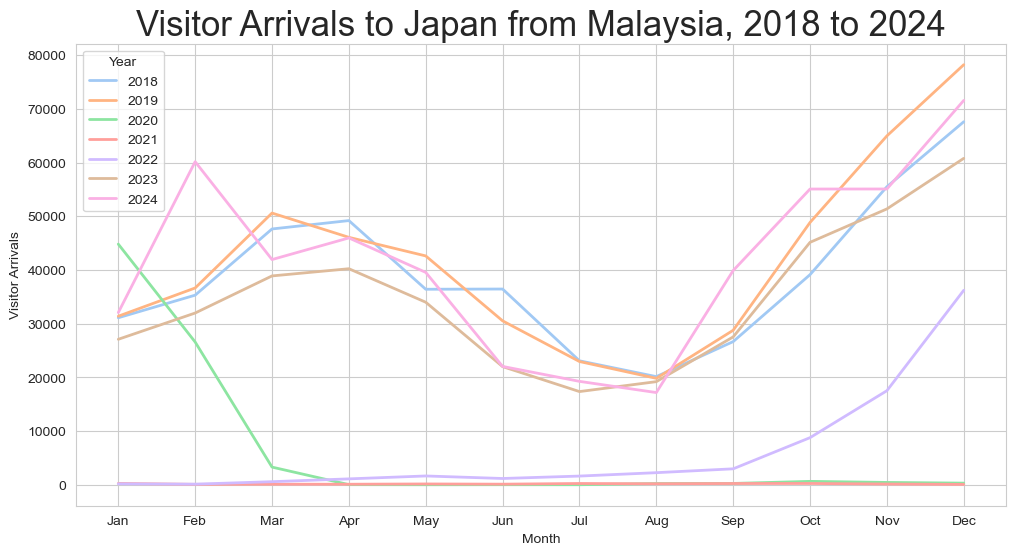

In [10]:
#Plotting line graph
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.lineplot(x='Month', y='Visitor_Arrivals', hue='Year', data=MY, palette='pastel', linewidth =2)
plt.legend(title='Year')
plt.xlabel('Month')
plt.ylabel('Visitor Arrivals')
plt.title('Visitor Arrivals to Japan from Malaysia, 2018 to 2024',size=25)


plt.savefig("Analysis_A2.png") 
plt.show()

## Analysis (Qualitative)
1. There is a spike in Malaysia visitor numbers in Feburary 2024, weirdly high as compared to Feburary numbers in other years.
2. Using preliminary data for 2024, Malaysia visitors to Japan has been surpassed pre-Covid 19 levels for certain months. Peak of Malaysia visitors is in December 2019.
3. Least popular month in 2023 is in July, while for 2024, it is in August.
4. A small observation is that there is a small number of visitors to Japan in October 2020, during the Covid-19 Pandemic.
5. First time that Malaysia visitors managed to surpass pre-Covid levels was in September 2023. 

## Graph to compare Singapore and Malaysia visitors to Japan in 2024


In [11]:
#Filtering data
SG_2024_Jan_to_Dec = SG_new[SG_new['Year'] == 2024].reset_index(drop=True)
MY_2024_Jan_to_Dec = MY[MY['Year'] == 2024].reset_index(drop=True)

#Adding country identifier
SG_2024_Jan_to_Dec['Country']  = 'SG'
MY_2024_Jan_to_Dec['Country']  = 'MY'

#Joining both tables
SGMY_2024_Jan_to_Dec = pd.concat([SG_2024_Jan_to_Dec, MY_2024_Jan_to_Dec], ignore_index=True)
SGMY_2024_Jan_to_Dec

,Month,Year,Month_of_Year,Visitor_Arrivals,Country
0,Jan,2024,0124,34140.0,SG
1,Feb,2024,0224,36915.0,SG
2,Mar,2024,0324,61047.0,SG
3,Apr,2024,0424,46324.0,SG
4,May,2024,0524,62676.0,SG
5,Jun,2024,0624,58925.0,SG
6,Jul,2024,0724,28115.0,SG
7,Aug,2024,0824,24781.0,SG
8,Sep,2024,0924,37433.0,SG
9,Oct,2024,1024,68790.0,SG


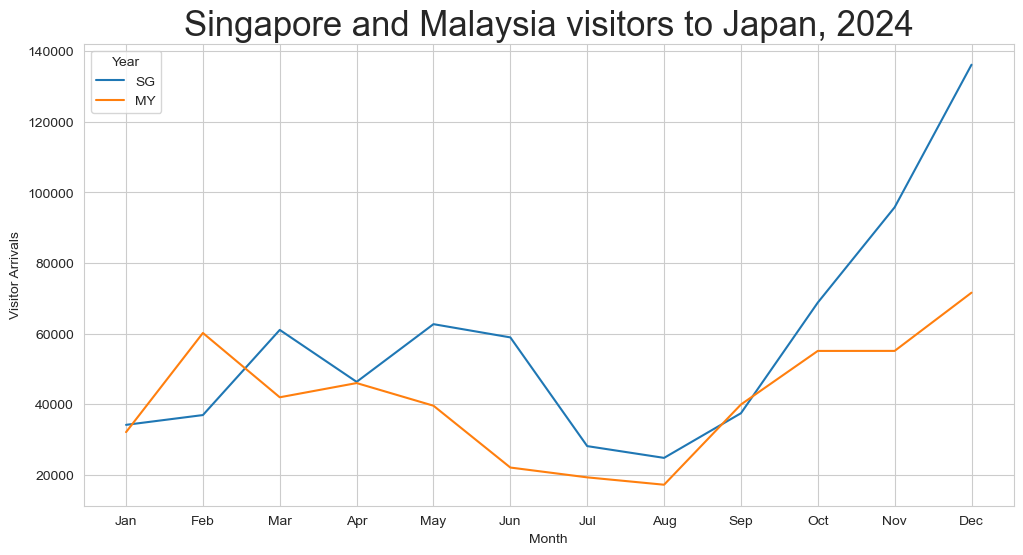

In [12]:
#Plotting line graph
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.lineplot(x='Month', y='Visitor_Arrivals', hue='Country', data=SGMY_2024_Jan_to_Dec)
plt.legend(title='Year')
plt.xlabel('Month')
plt.ylabel('Visitor Arrivals')
plt.title('Singapore and Malaysia visitors to Japan, 2024',size=25)


plt.savefig("Analysis_A2_1.png") 
plt.show()

## Analysis (Qualitative) - Singapore and Malaysia
1. Malaysia visitor numbers to Japan only exceeded Singapore visitor numbers in the months of Feburary and September.
2. Both countries see a similar trend where visitor numbers increase from August to December, with August being the through while December being the peak. The difference is that Singapore visitor numbers to Japan increases at a faster rate.
3. June is not a popular month for Malaysia visitors to visit Japan, while for Singapore, there is still a decent number of visitor arrivals to Japan for that month.

## Analysis A3: Singapore Visitor Numbers to Japan - as a proportion of overall visitor numbers

In [13]:
#import Overall Dataset
ALL = pd.read_csv('Inbound_Overall.csv')
ALL.info()
#Remove Growth Rate and country
ALL = ALL.drop(['Country/Area','Growth Rate(%)'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country/Area      16800 non-null  object
 1   Month (abbr)      16800 non-null  object
 2   Year              16800 non-null  int64 
 3   Growth Rate(%)    14474 non-null  object
 4   Visitor Arrivals  16400 non-null  object
dtypes: int64(1), object(4)
memory usage: 656.4+ KB


In [14]:
#Change Visitor Arrivals to integer type
ALL.rename(columns={'Visitor Arrivals':'Visitor_Arrivals'}, inplace=True)
ALL = ALL.replace(',','', regex=True)
ALL['Visitor_Arrivals'] = ALL['Visitor_Arrivals'].apply(pd.to_numeric, downcast="signed", errors='coerce')

#Convert to Date Time format
ALL.rename(columns={'Month (abbr)':'Month'}, inplace=True)
ALL["Month"] = ALL["Month"].str[:3] 
ALL['Month_of_Year'] = pd.to_datetime(
    ALL['Year'].astype(str) + ALL['Month'], format='%Y%b').dt.strftime('%m%y')
ALL=ALL.reindex(columns=neworder)

#Filter to 2024 only
ALL_2024 = ALL[ALL['Year'] == 2024]
ALL_2024


ALL_2024 = ALL_2024[['Month_of_Year','Visitor_Arrivals']].groupby(['Month_of_Year'],as_index=False ).sum()
ALL_2024


ALL_2024.iloc[-2,-1] = 3187000
ALL_2024.iloc[-1,-1] = 3489800

SG_only = SG_2024_Jan_to_Dec[['Month_of_Year','Visitor_Arrivals','Month']]
SG_only = SG_only.rename(columns={'Visitor_Arrivals': 'Visitor_Arrivals_SG'}) 

ALL_2024 = pd.merge(ALL_2024, SG_only, on='Month_of_Year', how='inner')
ALL_2024['Proportion_of_SG_Visitors(%)'] = round(ALL_2024['Visitor_Arrivals_SG']/ALL_2024['Visitor_Arrivals']*100,2)
ALL_2024.sort_values('Proportion_of_SG_Visitors(%)',ascending= False)
ALL_2024

,Month_of_Year,Visitor_Arrivals,Visitor_Arrivals_SG,Month,Proportion_of_SG_Visitors(%)
0,0124,2688478.0,34140.0,Jan,1.27
1,0224,2788224.0,36915.0,Feb,1.32
2,0324,3081781.0,61047.0,Mar,1.98
3,0424,3043003.0,46324.0,Apr,1.52
4,0524,3040294.0,62676.0,May,2.06
5,0624,3140642.0,58925.0,Jun,1.88
6,0724,3292602.0,28115.0,Jul,0.85
7,0824,2933381.0,24781.0,Aug,0.84
8,0924,2872487.0,37433.0,Sep,1.30
9,1024,3312193.0,68790.0,Oct,2.08


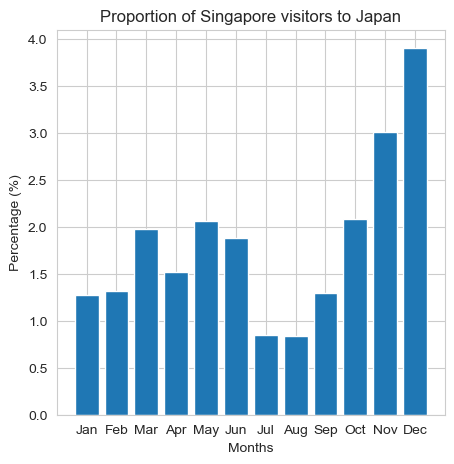

In [15]:
#Graph plotting
plt.figure(figsize=(5,5))
plt.bar('Month','Proportion_of_SG_Visitors(%)', data = ALL_2024)
plt.title('Proportion of Singapore visitors to Japan')
plt.xlabel('Months')
plt.ylabel('Percentage (%)')
plt.savefig("Analysis_A3_1.png") 
plt.show()

## Analysis (Qualitative)
Proportion wise, December has the highest proportion of Singapore visitors to Japan as compared to all foreign visitors to Japan.
This is followed by the months of November, October, May, and March.

July and August sees the least proportion of Singapore visitors to Japan as compared to all foreign visitors.

## Analysis A4: ANOVA Testing

Month
Apr     450109.0
Aug     238993.0
Dec    1159027.0
Feb     330743.0
Jan     306702.0
Jul     299838.0
Jun     542443.0
Mar     468739.0
May     474617.0
Nov     748226.0
Oct     504053.0
Sep     350378.0
Name: Visitor_Arrivals, dtype: float64


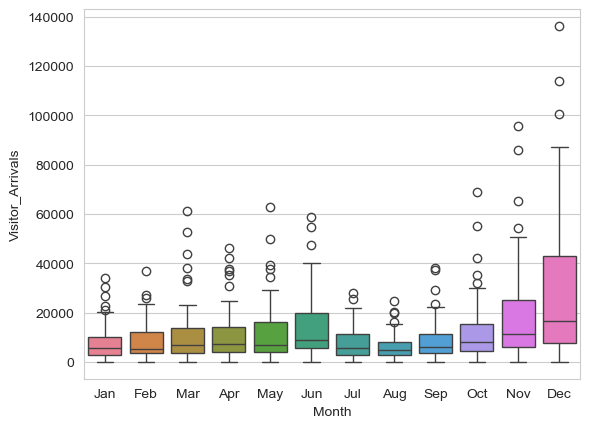

In [16]:
InboundSG_ANOVA = pd.read_csv('Inbound_Singapore_ANOVA.csv')
InboundSG_ANOVA

#Getting Rid of Growth Rate and Country/Area
InboundSG_ANOVA = InboundSG_ANOVA.drop(['Country/Area','Growth Rate(%)'], axis=1)
InboundSG_ANOVA.rename(columns={'Month (abbr)':'Month'}, inplace=True)


#Change Visitor Arrivals to integer type
InboundSG_ANOVA.rename(columns={'Visitor Arrivals':'Visitor_Arrivals'}, inplace=True)
InboundSG_ANOVA = InboundSG_ANOVA.replace(',','', regex=True)

InboundSG_ANOVA['Visitor_Arrivals'] = InboundSG_ANOVA['Visitor_Arrivals'].apply(pd.to_numeric, downcast="signed", errors='coerce')

#November and December data is missing. To add in these values.
InboundSG_ANOVA.iloc[-1,-1] = 136200
InboundSG_ANOVA.iloc[-2,-1] = 95800

#For Month Column, some rows have a weird dot at the end.
InboundSG_ANOVA["Month"] = InboundSG_ANOVA["Month"].str[:3] 


#sort values
print(InboundSG_ANOVA.groupby('Month')['Visitor_Arrivals'].sum())

#plotting boxplot
sns.boxplot(x = 'Month', y = 'Visitor_Arrivals', data = InboundSG_ANOVA, hue = 'Month')
plt.savefig("Analysis_A4.png") 

In [17]:
#import stats models
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Is there a statistically significant difference in Singapore visitor arrivals between the months.
#C stands for Categorical Variable
model = ols(formula = 'Visitor_Arrivals ~ C(Month)', data = InboundSG_ANOVA).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Visitor_Arrivals   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     6.525
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           4.87e-10
Time:                        18:34:12   Log-Likelihood:                -4672.6
No. Observations:                 420   AIC:                             9369.
Df Residuals:                     408   BIC:                             9418.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.286e+04   2815.844      4.567      0.000    7324.885    1.84e+04
C(Month)[T.Aug] -6031.8857   3982.204     -1.515      0.131   -1.39e+04    1796.313
C(Month)[T.Dec]  2.025e+04   3982.204      5.086      0.000    1.24e+04    2.81e+04
C(Month)[T.Feb] -3410.4571   3982.204     -0.856      0.392   -1.12e+04    4417.742
C(Month)[T.Jan] -4097.3429   3982.204     -1.029      0.304   -1.19e+04    3730.856
C(Month)[T.Jul] -4293.4571   3982.204     -1.078      0.282   -1.21e+04    3534.742
C(Month)[T.Jun]  2638.1143   3982.204      0.662      0.508   -5190.085    1.05e+04
C(Month)[T.Mar]   532.2857   3982.204      0.134      0.894   -7295.913    8360.485
C(Month)[T.May]   700.2286   3982.204      0.176      0.861   -7127.970    8528.428
C(Month)[T.Nov]  8517.6286   3982.204      2.139      0.033     689.430    1.63e+04
C(Month)[T.Oct]  1541.2571   3982.204      0.387      0.699   -6286.942    9369.456
C(Month)[T.Sep] -2849.4571   3982.204     -0.716      0.475   -1.07e+04    4978.742
==============================================================================
Omnibus:                      207.866   Durbin-Watson:                   0.302
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1190.528
Skew:                           2.102   Prob(JB):                    3.02e-259
Kurtosis:                      10.097   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#NULL HYPOTHESIS - There is no difference in visitor arrivals based on Month
#Alternative HYPOTHESIS - There is a difference in visitor arrivals based on Month
sm.stats.anova_lm(model, typ = 2)

#Conclusion, as p-value is 4.867323e-10 < 0.05, can reject the null hypothesis.

,sum_sq,df,F,PR(>F)
C(Month),1.991782e+10,11.0,6.524752,4.867323e-10
Residual,1.132258e+11,408.0,NaN,NaN


In [19]:
#pairwise test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_oneway = pairwise_tukeyhsd(endog = InboundSG_ANOVA['Visitor_Arrivals'], groups = InboundSG_ANOVA['Month'], alpha = 0.05)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Apr,Aug,-6031.8857,0.936,-19122.1649,7058.3934,False
Apr,Dec,20254.8,0.0,7164.5209,33345.0791,True
Apr,Feb,-3410.4571,0.9994,-16500.7363,9679.822,False
Apr,Jan,-4097.3429,0.997,-17187.622,8992.9363,False
Apr,Jul,-4293.4571,0.9954,-17383.7363,8796.822,False
Apr,Jun,2638.1143,1.0,-10452.1649,15728.3934,False
Apr,Mar,532.2857,1.0,-12557.9934,13622.5649,False
Apr,May,700.2286,1.0,-12390.0506,13790.5077,False
Apr,Nov,8517.6286,0.595,-4572.6506,21607.9077,False
Apr,Oct,1541.2571,1.0,-11549.022,14631.5363,False


## Analysis B1: Prefecture Visit Rate - Singapore

In [20]:
# import relevant packages
import geopandas as gpd

# import relevant data - map
map = gpd.read_file("maps/jpn_admbnda_adm1_2019.shp")

# import relevant data - prefecture visit rate of singapore visitors
SG_Visit_Rate = pd.read_csv('Singapore.csv')
SG_Visit_Rate_copy = SG_Visit_Rate.copy()
SG_Visit_Rate['Prefecture'] = SG_Visit_Rate['Prefecture'].astype("string")
SG_Visit_Rate.info()
SG_Visit_Rate = SG_Visit_Rate.sort_values('Prefecture').reset_index(drop = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Prefecture     47 non-null     string 
 1   Visit Rate(%)  47 non-null     float64
dtypes: float64(1), string(1)
memory usage: 880.0 bytes


In [21]:
SG_Visit_Rate = SG_Visit_Rate.rename(columns={'Prefecture': 'ADM1_EN'}) 


def find_cell_with_word(SG_Visit_Rate, word):
  for row_index, row in SG_Visit_Rate.iterrows():
    for col_index, cell_value in enumerate(row):
      if isinstance(cell_value, str) and word in cell_value:
        return row_index
  return None


Tokyo = find_cell_with_word(SG_Visit_Rate, 'Tokyo')
SG_Visit_Rate.loc[Tokyo,'ADM1_EN'] = 'Tokyo Prefecture'

Osaka = find_cell_with_word(SG_Visit_Rate, 'Osaka')
SG_Visit_Rate.loc[Osaka,'ADM1_EN'] = 'Osaka Prefecture'

Kyoto = find_cell_with_word(SG_Visit_Rate, 'Kyoto')
SG_Visit_Rate.loc[Kyoto,'ADM1_EN'] = 'Kyoto Prefecture'

Hokkaido = find_cell_with_word(SG_Visit_Rate, 'Hokkaido')
SG_Visit_Rate.loc[Hokkaido,'ADM1_EN'] = 'Hokkaido Prefecture'

Kagoshima = find_cell_with_word(SG_Visit_Rate, 'Kagoshima')
SG_Visit_Rate.loc[Kagoshima,'ADM1_EN'] = 'Kagoshima Prefecture'

Hyogo = find_cell_with_word(SG_Visit_Rate, 'Hyogo')
SG_Visit_Rate.loc[Hyogo,'ADM1_EN'] = 'Hyōgo Prefecture'

Kochi = find_cell_with_word(SG_Visit_Rate, 'Kochi')
SG_Visit_Rate.loc[Kochi,'ADM1_EN'] = 'Kōchi Prefecture'

Oita = find_cell_with_word(SG_Visit_Rate, 'Oita')
SG_Visit_Rate.loc[Oita,'ADM1_EN'] = 'Ōita Prefecture'
#For ANALYSIS B3
SG_2023  = SG_Visit_Rate.copy()


map['ADM1_EN'] =  map['ADM1_EN'].str.replace('\xa0', '')
map['ADM1_EN'] = map['ADM1_EN'] + ' Prefecture'
map['ADM1_EN'] = map['ADM1_EN'].astype("string")
map_and_stats=map.merge(SG_Visit_Rate, on="ADM1_EN")

In [22]:
map_and_stats

,ADM0_EN,ADM0_JA,ADM0_PCODE,ADM1_EN,ADM1_JA,ADM1_PCODE,geometry,Visit Rate(%)
0,Japan,日本,JP,Aichi Prefecture,愛知県,JP23,"MULTIPOLYGON (((137.00719 34.6781, 137.00506 3...",8.0906
1,Japan,日本,JP,Akita Prefecture,秋田県,JP05,"MULTIPOLYGON (((139.87633 39.1197, 139.86987 3...",0.3917
2,Japan,日本,JP,Aomori Prefecture,青森県,JP02,"MULTIPOLYGON (((141.52791 40.54101, 141.52423 ...",1.4851
3,Japan,日本,JP,Chiba Prefecture,千葉県,JP12,"MULTIPOLYGON (((140.11286 35.57128, 140.10691 ...",48.8421
4,Japan,日本,JP,Ehime Prefecture,愛媛県,JP38,"MULTIPOLYGON (((132.55887 32.93409, 132.56388 ...",0.2565
5,Japan,日本,JP,Fukui Prefecture,福井県,JP18,"MULTIPOLYGON (((136.06653 35.66446, 136.06244 ...",0.0000
6,Japan,日本,JP,Fukuoka Prefecture,福岡県,JP40,"MULTIPOLYGON (((130.13217 33.55678, 130.12714 ...",5.4936
7,Japan,日本,JP,Fukushima Prefecture,福島県,JP07,"MULTIPOLYGON (((140.94816 37.85372, 140.9498 3...",0.2774
8,Japan,日本,JP,Gifu Prefecture,岐阜県,JP21,"POLYGON ((137.29364 36.45964, 137.299 36.45872...",4.6171
9,Japan,日本,JP,Gunma Prefecture,群馬県,JP10,"POLYGON ((139.17773 36.98512, 139.1765 36.9802...",0.3066


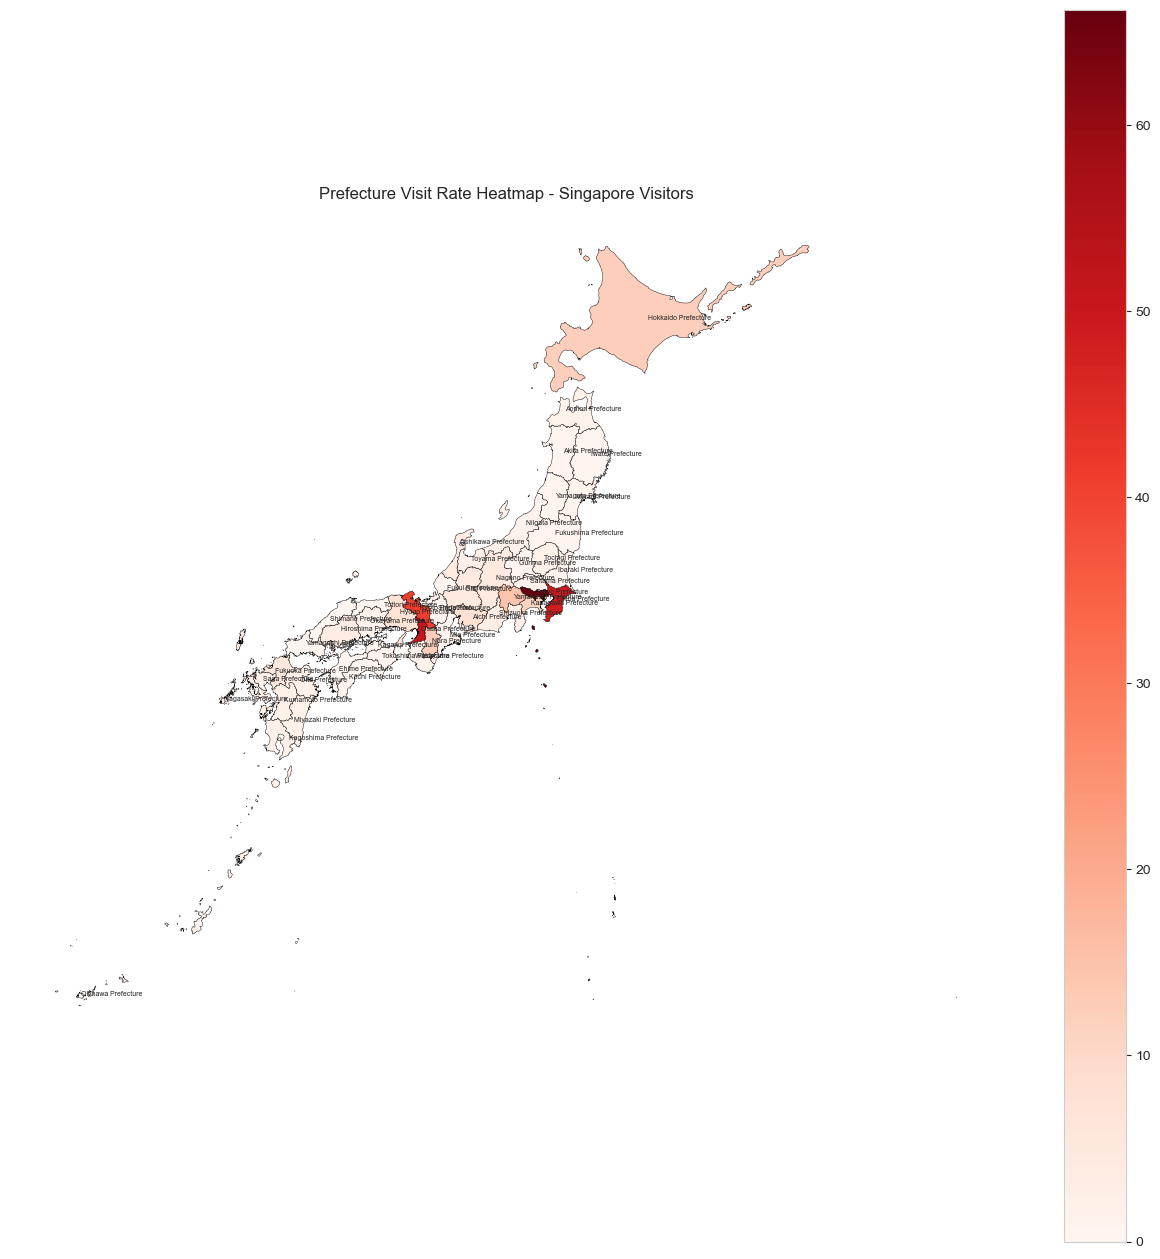

In [23]:
map_and_stats["label"] = map_and_stats["geometry"].representative_point()
map_and_stats_labels = map_and_stats.copy()
map_and_stats_labels.set_geometry("label", inplace = True)

fig, ax = plt.subplots(1, figsize=(16, 16))
map_and_stats.plot(column="Visit Rate(%)",cmap = 'Reds',edgecolor = "black", linewidth=0.3, ax=ax, legend = True)
ax.axis("off")
plt.title("Prefecture Visit Rate Heatmap - Singapore Visitors")
labels = []

for x, y, label in zip(map_and_stats_labels.geometry.x, map_and_stats_labels.geometry.y, map_and_stats_labels["ADM1_EN"]):
    labels.append(plt.text(x, y, label, fontsize = 5))

plt.savefig("Analysis_B1.png") 

## Analysis (Qualitative)
Based on the visual, we can conclude that most Singapore visitors to Japan are only concentrated on a few prefectures.

The most visited prefecture is Tokyo, according to the map above, it is the most red.
This is followed by Chiba, Osaka and Kyoto prefectures.
Other than these prefectures, Nara, Hokkaido, Yamanashi, Kanagawa, Hyogo, Aichi prefectures sees a sizeable proportion of Singapore visitors.

Below is a table that shows the most to least visited prefectures by Singapore visitors. We also notice some prefectures are reported to have zero percent of Singapore visitors, namely Fukui and Shimanae Prefecture.

In [24]:
SG_Visit_Rate_copy

,Prefecture,Visit Rate(%)
0,Tokyo,66.1884
1,Osaka,50.5606
2,Chiba Prefecture,48.8421
3,Kyoto,41.0848
4,Yamanashi Prefecture,14.6784
5,Nara Prefecture,12.2697
6,Hokkaido,12.2533
7,Kanagawa Prefecture,11.1340
8,Aichi Prefecture,8.0906
9,Hyogo Prefecture,7.3094


## Analysis B2: Overall visit Rate and Singapore vs Overall Prefecture Visit Rate

In [25]:
#Now adding overall visit rate

All_Visit_Rate = pd.read_csv('Overall.csv')
All_Visit_Rate['Prefecture'] = All_Visit_Rate['Prefecture'].astype("string")
All_Visit_Rate_copy = All_Visit_Rate.copy()
All_Visit_Rate = All_Visit_Rate.sort_values('Prefecture').reset_index(drop = True)
All_Visit_Rate

All_Visit_Rate = All_Visit_Rate.rename(columns={'Prefecture': 'ADM1_EN'}) 

Tokyo = find_cell_with_word(All_Visit_Rate, 'Tokyo')
All_Visit_Rate.loc[Tokyo,'ADM1_EN'] = 'Tokyo Prefecture'

Osaka = find_cell_with_word(All_Visit_Rate, 'Osaka')
All_Visit_Rate.loc[Osaka,'ADM1_EN'] = 'Osaka Prefecture'

Kyoto = find_cell_with_word(All_Visit_Rate, 'Kyoto')
All_Visit_Rate.loc[Kyoto,'ADM1_EN'] = 'Kyoto Prefecture'

Hokkaido = find_cell_with_word(All_Visit_Rate, 'Hokkaido')
All_Visit_Rate.loc[Hokkaido,'ADM1_EN'] = 'Hokkaido Prefecture'

Kagoshima = find_cell_with_word(All_Visit_Rate, 'Kagoshima')
All_Visit_Rate.loc[Kagoshima,'ADM1_EN'] = 'Kagoshima Prefecture'

Hyogo = find_cell_with_word(All_Visit_Rate, 'Hyogo')
All_Visit_Rate.loc[Hyogo,'ADM1_EN'] = 'Hyōgo Prefecture'

Kochi = find_cell_with_word(All_Visit_Rate, 'Kochi')
All_Visit_Rate.loc[Kochi,'ADM1_EN'] = 'Kōchi Prefecture'

Oita = find_cell_with_word(All_Visit_Rate, 'Oita')
All_Visit_Rate.loc[Oita,'ADM1_EN'] = 'Ōita Prefecture'

All_Visit_Rate_copy

,Prefecture,Visit Rate(%)
0,Tokyo,48.6321
1,Osaka,43.5274
2,Chiba Prefecture,36.0577
3,Kyoto,33.6701
4,Fukuoka Prefecture,13.3668
5,Nara Prefecture,8.9274
6,Kanagawa Prefecture,8.2651
7,Hokkaido,7.0035
8,Yamanashi Prefecture,6.9960
9,Hyogo Prefecture,6.2979


In [26]:
map_and_stats_all =map.merge(All_Visit_Rate, on="ADM1_EN")
map_and_stats_all

,ADM0_EN,ADM0_JA,ADM0_PCODE,ADM1_EN,ADM1_JA,ADM1_PCODE,geometry,Visit Rate(%)
0,Japan,日本,JP,Aichi Prefecture,愛知県,JP23,"MULTIPOLYGON (((137.00719 34.6781, 137.00506 3...",5.1765
1,Japan,日本,JP,Akita Prefecture,秋田県,JP05,"MULTIPOLYGON (((139.87633 39.1197, 139.86987 3...",0.4465
2,Japan,日本,JP,Aomori Prefecture,青森県,JP02,"MULTIPOLYGON (((141.52791 40.54101, 141.52423 ...",1.0391
3,Japan,日本,JP,Chiba Prefecture,千葉県,JP12,"MULTIPOLYGON (((140.11286 35.57128, 140.10691 ...",36.0577
4,Japan,日本,JP,Ehime Prefecture,愛媛県,JP38,"MULTIPOLYGON (((132.55887 32.93409, 132.56388 ...",0.4103
5,Japan,日本,JP,Fukui Prefecture,福井県,JP18,"MULTIPOLYGON (((136.06653 35.66446, 136.06244 ...",0.1828
6,Japan,日本,JP,Fukuoka Prefecture,福岡県,JP40,"MULTIPOLYGON (((130.13217 33.55678, 130.12714 ...",13.3668
7,Japan,日本,JP,Fukushima Prefecture,福島県,JP07,"MULTIPOLYGON (((140.94816 37.85372, 140.9498 3...",0.4449
8,Japan,日本,JP,Gifu Prefecture,岐阜県,JP21,"POLYGON ((137.29364 36.45964, 137.299 36.45872...",3.1671
9,Japan,日本,JP,Gunma Prefecture,群馬県,JP10,"POLYGON ((139.17773 36.98512, 139.1765 36.9802...",0.4799


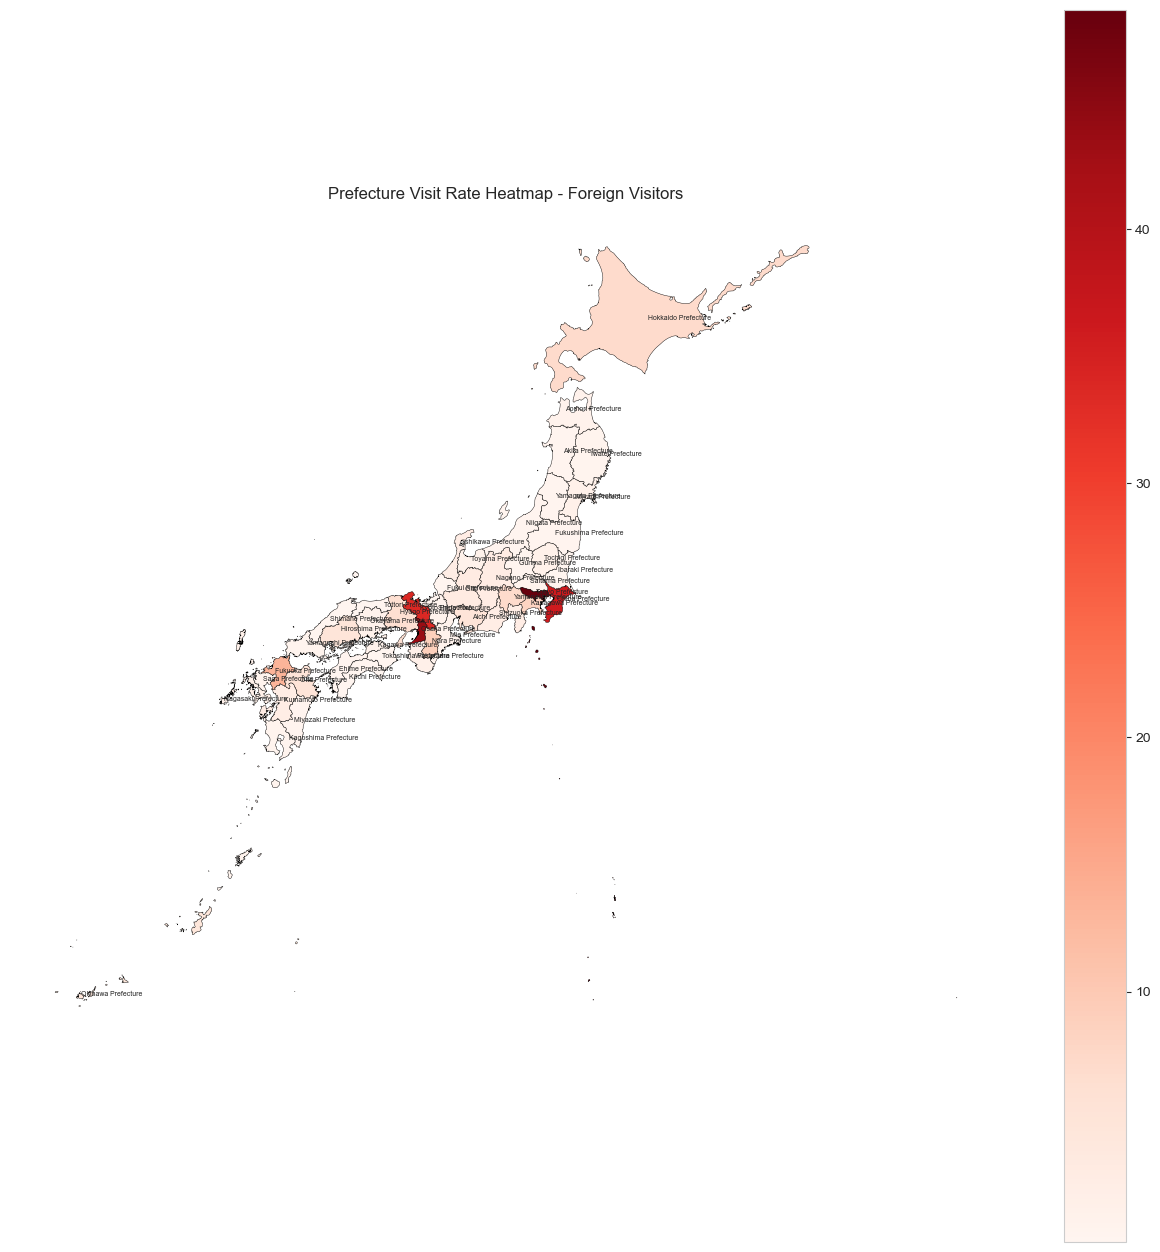

In [27]:
map_and_stats_all["label"] = map_and_stats_all["geometry"].representative_point()
map_and_stats_labels_all = map_and_stats_all.copy()
map_and_stats_labels_all.set_geometry("label", inplace = True)

fig, ax = plt.subplots(1, figsize=(16, 16))
map_and_stats_all.plot(column="Visit Rate(%)",cmap = 'Reds',edgecolor = "black", linewidth=0.3, ax=ax, legend = True)
ax.axis("off")
plt.title("Prefecture Visit Rate Heatmap - Foreign Visitors")
labels = []

for x, y, label in zip(map_and_stats_labels_all.geometry.x, map_and_stats_labels_all.geometry.y, map_and_stats_labels_all["ADM1_EN"]):
    labels.append(plt.text(x, y, label, fontsize = 5))

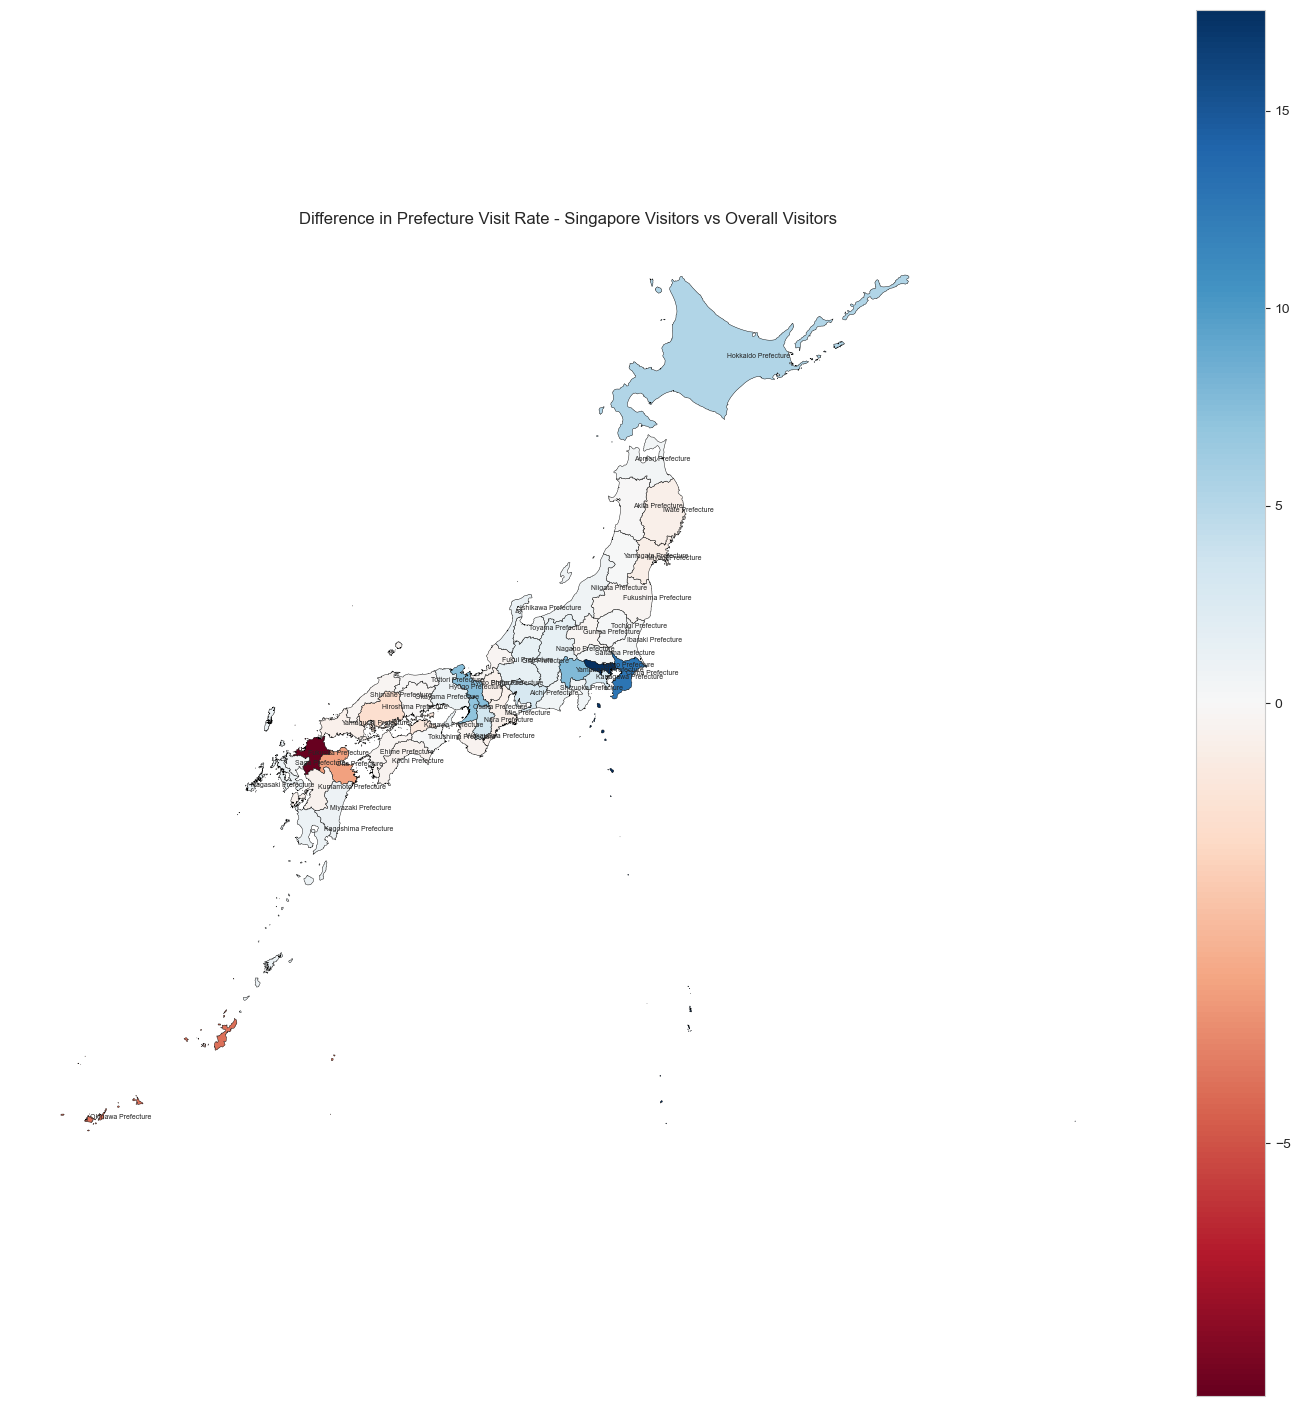

In [28]:
import matplotlib.colors as mcolors

All_Visit_Rate_copy
Combined_Visit_Rate = SG_Visit_Rate_copy.merge(All_Visit_Rate_copy, on="Prefecture")
Combined_Visit_Rate = Combined_Visit_Rate.rename(columns={'Visit Rate(%)_x': 'Singapore Visit Rate(%)', 'Visit Rate(%)_y': 'Overall Visit Rate(%)'})

Combined_Visit_Rate['Is Singapore Visit Rate Higher'] = Combined_Visit_Rate.apply(lambda row: 'Yes' if row['Singapore Visit Rate(%)'] > row['Overall Visit Rate(%)'] else 'No', axis=1)
Combined_Visit_Rate['Higher by(%)'] = Combined_Visit_Rate['Singapore Visit Rate(%)'] - Combined_Visit_Rate['Overall Visit Rate(%)']
Combined_Visit_Rate = Combined_Visit_Rate.rename(columns={'Prefecture': 'ADM1_EN'}) 

Tokyo = find_cell_with_word(Combined_Visit_Rate, 'Tokyo')
Combined_Visit_Rate.loc[Tokyo,'ADM1_EN'] = 'Tokyo Prefecture'

Osaka = find_cell_with_word(Combined_Visit_Rate, 'Osaka')
Combined_Visit_Rate.loc[Osaka,'ADM1_EN'] = 'Osaka Prefecture'

Kyoto = find_cell_with_word(Combined_Visit_Rate, 'Kyoto')
Combined_Visit_Rate.loc[Kyoto,'ADM1_EN'] = 'Kyoto Prefecture'

Hokkaido = find_cell_with_word(Combined_Visit_Rate, 'Hokkaido')
Combined_Visit_Rate.loc[Hokkaido,'ADM1_EN'] = 'Hokkaido Prefecture'

Kagoshima = find_cell_with_word(Combined_Visit_Rate, 'Kagoshima')
Combined_Visit_Rate.loc[Kagoshima,'ADM1_EN'] = 'Kagoshima Prefecture'

Hyogo = find_cell_with_word(Combined_Visit_Rate, 'Hyogo')
Combined_Visit_Rate.loc[Hyogo,'ADM1_EN'] = 'Hyōgo Prefecture'

Kochi = find_cell_with_word(Combined_Visit_Rate, 'Kochi')
Combined_Visit_Rate.loc[Kochi,'ADM1_EN'] = 'Kōchi Prefecture'

Oita = find_cell_with_word(Combined_Visit_Rate, 'Oita')
Combined_Visit_Rate.loc[Oita,'ADM1_EN'] = 'Ōita Prefecture'

Combined_Visit_Rate_copy = Combined_Visit_Rate.sort_values('Higher by(%)').reset_index(drop = True).copy()

map_and_stats_combined =map.merge(Combined_Visit_Rate, on="ADM1_EN")
map_and_stats_combined = map_and_stats_combined.sort_values('Higher by(%)').reset_index(drop = True)

map_and_stats_combined["label"] = map_and_stats_combined["geometry"].representative_point()
map_and_stats_labels_combined = map_and_stats_all.copy()
map_and_stats_labels_combined.set_geometry("label", inplace = True)

norm = mcolors.TwoSlopeNorm(vmin=Combined_Visit_Rate['Higher by(%)'].min(), vcenter=0, vmax=Combined_Visit_Rate['Higher by(%)'].max())

fig, ax = plt.subplots(1, figsize=(18, 18))
map_and_stats_combined.plot(column='Higher by(%)',cmap = 'RdBu',edgecolor = "black", linewidth=0.3, ax=ax, legend = True, norm = norm)
ax.axis("off")
plt.title("Difference in Prefecture Visit Rate - Singapore Visitors vs Overall Visitors")
labels = []

for x, y, label in zip(map_and_stats_labels_combined.geometry.x, map_and_stats_labels_combined.geometry.y, map_and_stats_labels_combined["ADM1_EN"]):
    labels.append(plt.text(x, y, label, fontsize = 5))

plt.savefig("Analysis_B2.png") 

## Analysis
How to read the chart: 
Prefectures that are the darkest blue mean that the Visit Rate by Singapore visitors is the most as comapred to the Overall Visit Rate.
Prefectures that are the darkest red mean that the Visit Rate by Singapore visitors is the least as comapred to the Overall Visit Rate.
Prefectures that look white in colour mean that the Visit Rate by Singapore visitors similar to the Overall Visit Rate.

As compared to other foreign visitors, there is a greater proportion of Singapore visitors in Tokyo, Chiba, Yamanashi, Kyoto, Osaka and Hokkaido.
For prefectures that are not as visited as Singapore visitors, they are those that are located in Western Japan, namely Fukuoka, Okinawa, Oita and Hiroshima prefectures.

My thoughts: I am surprised that for Fukuoka Prefecture, Singapore's Visit Rate is the lowest than the Overall Visit Rate. This is also added by the fact that there are daily flights from Singapore to Fukuoka.

In [29]:
Combined_Visit_Rate_copy

,ADM1_EN,Singapore Visit Rate(%),Overall Visit Rate(%),Is Singapore Visit Rate Higher,Higher by(%)
0,Fukuoka Prefecture,5.4936,13.3668,No,-7.8732
1,Okinawa Prefecture,0.0327,4.3754,No,-4.3427
2,Ōita Prefecture,2.0164,5.2289,No,-3.2125
3,Hiroshima Prefecture,3.3582,4.7081,No,-1.3499
4,Kagawa Prefecture,0.0925,0.9839,No,-0.8914
5,Miyagi Prefecture,0.8544,1.3843,No,-0.5299
6,Iwate Prefecture,0.1306,0.5942,No,-0.4636
7,Mie Prefecture,0.2838,0.7136,No,-0.4298
8,Shiga Prefecture,0.3394,0.7520,No,-0.4126
9,Yamaguchi Prefecture,0.2105,0.6073,No,-0.3968


## Analysis B3: Singapore Visitors Prefecture Visit Rate (2018 vs 2023)

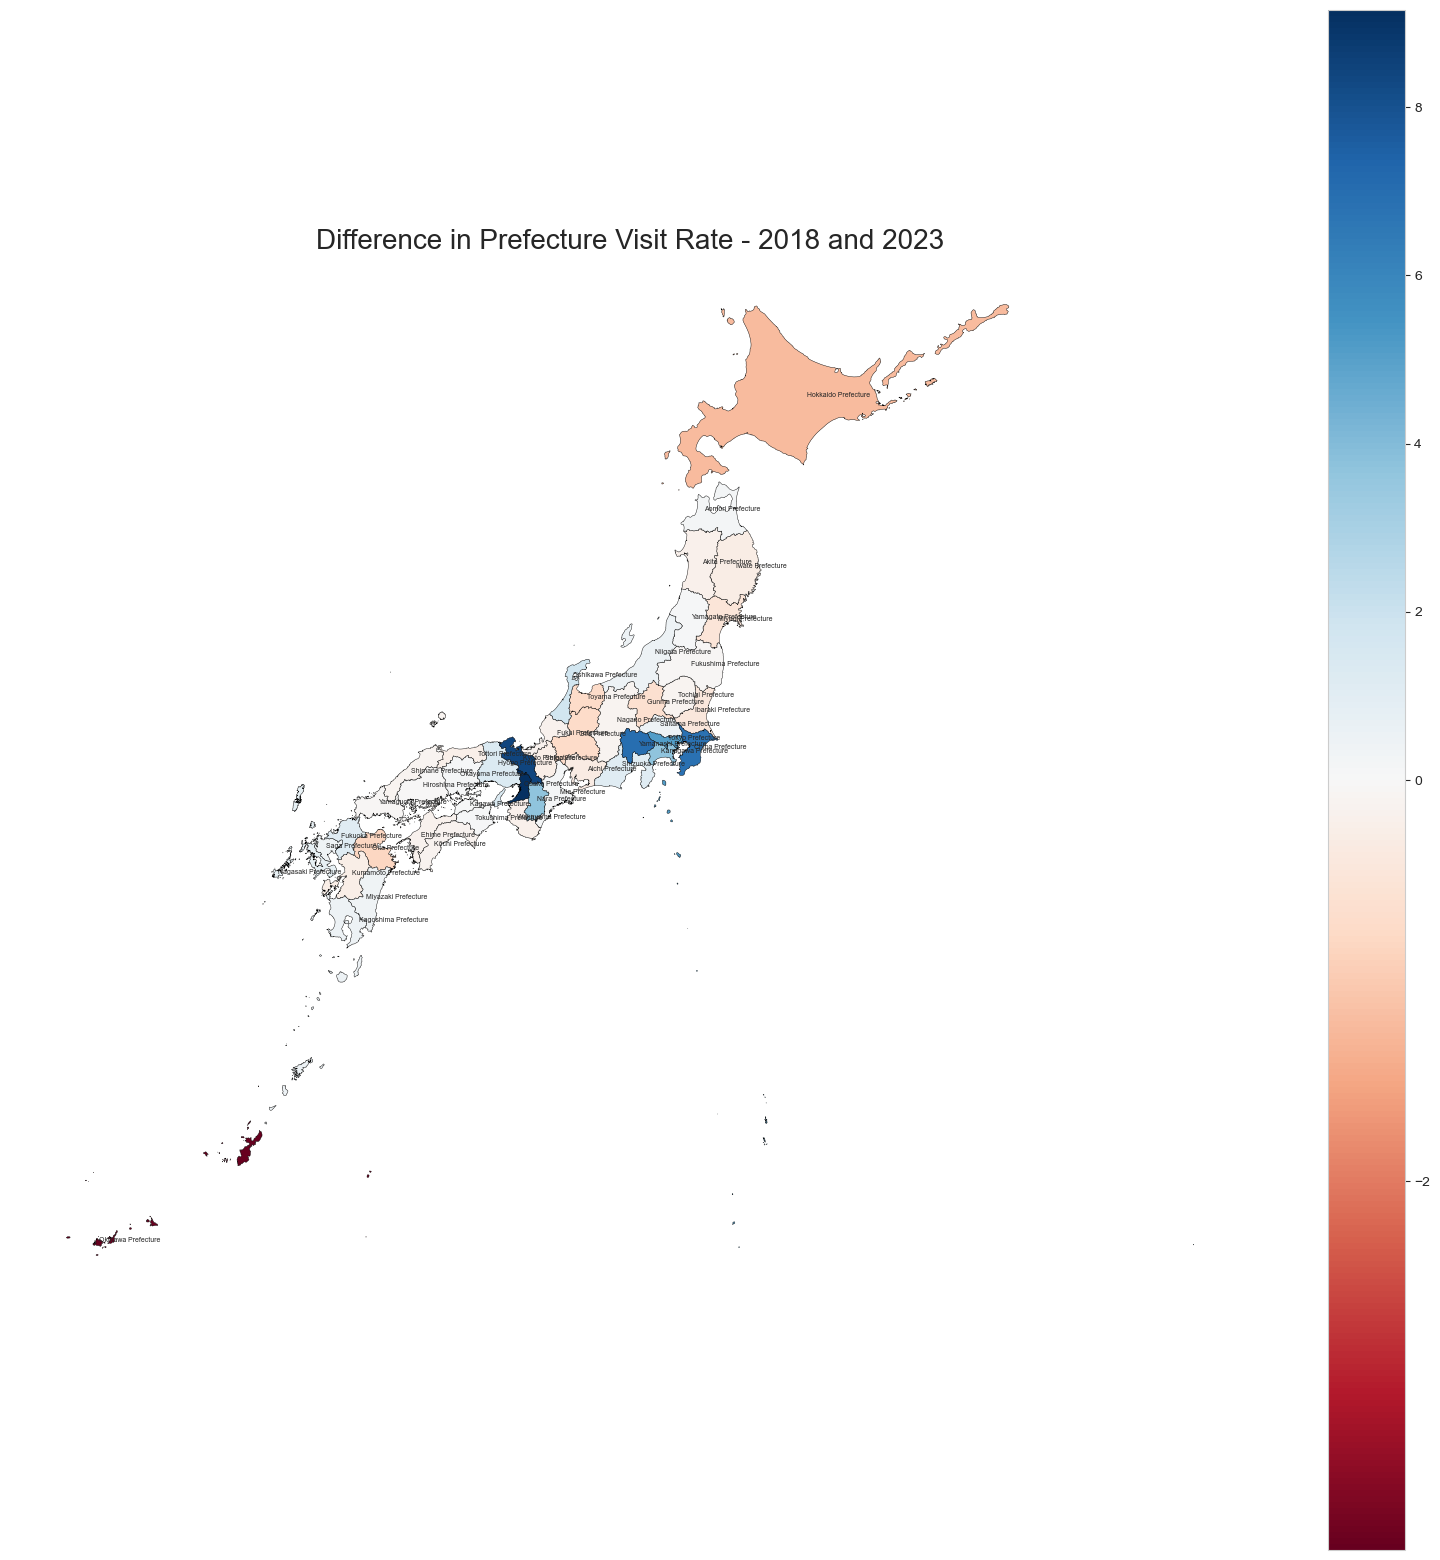

In [30]:
# import relevant data - prefecture visit rate of singapore visitors
SG_Visit_Rate_2018 = pd.read_csv('Singapore_2018.csv')
SG_Visit_Rate_2018['Prefecture'] = SG_Visit_Rate_2018['Prefecture'].astype("string")
SG_Visit_Rate_2018 = SG_Visit_Rate_2018.sort_values('Prefecture').reset_index(drop = True)

SG_Visit_Rate_2018 = SG_Visit_Rate_2018.rename(columns={'Prefecture': 'ADM1_EN','Visit Rate(%)':'Visit Rate 2018(%)'}) 

Tokyo = find_cell_with_word(SG_Visit_Rate_2018, 'Tokyo')
SG_Visit_Rate_2018.loc[Tokyo,'ADM1_EN'] = 'Tokyo Prefecture'

Osaka = find_cell_with_word(SG_Visit_Rate_2018, 'Osaka')
SG_Visit_Rate_2018.loc[Osaka,'ADM1_EN'] = 'Osaka Prefecture'

Kyoto = find_cell_with_word(SG_Visit_Rate_2018, 'Kyoto')
SG_Visit_Rate_2018.loc[Kyoto,'ADM1_EN'] = 'Kyoto Prefecture'

Hokkaido = find_cell_with_word(SG_Visit_Rate_2018, 'Hokkaido')
SG_Visit_Rate_2018.loc[Hokkaido,'ADM1_EN'] = 'Hokkaido Prefecture'

Kagoshima = find_cell_with_word(SG_Visit_Rate_2018, 'Kagoshima')
SG_Visit_Rate_2018.loc[Kagoshima,'ADM1_EN'] = 'Kagoshima Prefecture'

Hyogo = find_cell_with_word(SG_Visit_Rate_2018, 'Hyogo')
SG_Visit_Rate_2018.loc[Hyogo,'ADM1_EN'] = 'Hyōgo Prefecture'

Kochi = find_cell_with_word(SG_Visit_Rate_2018, 'Kochi')
SG_Visit_Rate_2018.loc[Kochi,'ADM1_EN'] = 'Kōchi Prefecture'

Oita = find_cell_with_word(SG_Visit_Rate_2018, 'Oita')
SG_Visit_Rate_2018.loc[Oita,'ADM1_EN'] = 'Ōita Prefecture'

SG_2018_2023 = SG_2023.merge(SG_Visit_Rate_2018, on  = "ADM1_EN")
SG_2018_2023['Increase in Visitors (%)?'] = SG_2018_2023.apply(lambda row: 'Yes' if row['Visit Rate(%)'] > row['Visit Rate 2018(%)'] else 'No', axis=1)
SG_2018_2023['Increase/Decrease by (%)'] = SG_2018_2023['Visit Rate(%)']  - SG_2018_2023['Visit Rate 2018(%)']
SG_2018_2023

SG_map_comparison =map.merge(SG_2018_2023, on="ADM1_EN")
SG_map_comparison = SG_map_comparison.sort_values('Increase/Decrease by (%)').reset_index(drop = True)

SG_map_comparison["label"] = SG_map_comparison["geometry"].representative_point()
SG_map_comparison_label = SG_map_comparison.copy()
SG_map_comparison_label.set_geometry("label", inplace = True)

norm2 = mcolors.TwoSlopeNorm(vmin=SG_map_comparison['Increase/Decrease by (%)'].min(), vcenter=0, vmax=SG_map_comparison['Increase/Decrease by (%)'].max())

fig, ax = plt.subplots(1, figsize=(20, 20))
SG_map_comparison.plot(column='Increase/Decrease by (%)',cmap = 'RdBu',edgecolor = "black", linewidth=0.3, ax=ax, legend = True, norm = norm2)
ax.axis("off")
plt.title("Difference in Prefecture Visit Rate - 2018 and 2023", size = 20)
labels = []

for x, y, label in zip(SG_map_comparison_label.geometry.x, SG_map_comparison_label.geometry.y, SG_map_comparison_label["ADM1_EN"]):
    labels.append(plt.text(x, y, label, fontsize = 5))

plt.savefig("Analysis_B3.png") 

## Analysis
How to read the chart: 
Increase in Prefecture Visit Rate DOES NOT mean that overall number of visitors to the specific prefecture has increased. It means that the proportion of Singapore visitors to Japan for sightseeing has increased for the prefecture. There may be cases where overall number of visitors to Japan and the prefecture increases from 2018 to 2023, but percentage wise Prefecture Visit Rate decreases.

From 2018 to 2023, these are the biggest changes in Prefecture Visit Rates:
Biggest drops: Okinawa, Hokkaido, Oita
Increase increases: Osaka, Kyoto, Yamanashi, Chiba

In [31]:
SG_2018_2023.sort_values('Increase/Decrease by (%)').reset_index(drop = True)

,ADM1_EN,Visit Rate(%),Visit Rate 2018(%),Increase in Visitors (%)?,Increase/Decrease by (%)
0,Okinawa Prefecture,0.0327,3.8718,No,-3.8391
1,Hokkaido Prefecture,12.2533,13.4692,No,-1.2159
2,Ōita Prefecture,2.0164,2.8454,No,-0.8290
3,Gifu Prefecture,4.6171,5.3610,No,-0.7439
4,Toyama Prefecture,1.6207,2.3595,No,-0.7388
5,Gunma Prefecture,0.3066,0.9098,No,-0.6032
6,Miyagi Prefecture,0.8544,1.3607,No,-0.5063
7,Ibaraki Prefecture,0.4122,0.8383,No,-0.4261
8,Aichi Prefecture,8.0906,8.3931,No,-0.3025
9,Iwate Prefecture,0.1306,0.4162,No,-0.2856
